# 10. Podando el arbol

## Importamos paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  

import graphviz_tools as agt
import mlflow_utils as a_mlflow_u
import tree_utils as atu

## Cargamos nuestros dataset

In [2]:
file_cervezas_unicas_resumen_valores_con_clase_training = 'dataset/cervezas_unicas_resumen_valores_con_clase_train.csv'
file_cervezas_unicas_resumen_valores_con_clase_testing = 'dataset/cervezas_unicas_resumen_valores_con_clase_test.csv'

campos = [
    'beer_abv', 
    'review_aroma', 
    'review_appearance', 
    'review_taste', 
    'review_overall', 
    'review_palate', 
    'es_popular'
]

df_training_validacion = pd.read_csv(file_cervezas_unicas_resumen_valores_con_clase_training)
df_testing = pd.read_csv(file_cervezas_unicas_resumen_valores_con_clase_testing)

df_training_validacion = df_training_validacion.loc[:, campos]
df_testing = df_testing.loc[:, campos]

df_training_validacion.head()

,beer_abv,review_aroma,review_appearance,review_taste,review_overall,review_palate,es_popular
0,6.0,3.564000,3.736000,3.592000,3.776000,3.620000,NO
1,4.5,2.608108,3.351351,2.743243,2.945946,3.054054,NO
2,4.4,3.727273,3.727273,3.545455,3.545455,3.545455,NO
3,7.5,3.750000,3.500000,3.750000,3.750000,4.000000,NO
4,7.8,2.500000,3.500000,3.500000,3.500000,3.500000,NO


In [3]:
random_state = 1
test_size = 0.3

atributos = [
    'beer_abv', 
    'review_aroma', 
    'review_appearance', 
    'review_taste', 
    'review_overall', 
    'review_palate'
]
clase = ['es_popular']

Y_df_training_validacion = df_training_validacion.loc[:, clase]
df_training_validacion = df_training_validacion.loc[:, atributos]

### Tambien abrimos en X e Y el dataset de tesging

In [4]:
X_testing = df_testing.loc[:, atributos]
Y_testing = df_testing.loc[:, clase]

## Generamos el modelo

### Utilizamos estos parámetros para crear un nuevo modelo

In [5]:
umbral_de_corte = 0.9602996310010641
max_depth = 12
min_samples_split = 0.015307032770458954
max_features = 0.9999

#criterion='entropy'
criterion='gini'
#criterion='log_loss'

clf = DecisionTreeClassifier(
            criterion = criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            max_features=max_features,
            random_state=1
        )
_ = clf.fit(df_training_validacion, Y_df_training_validacion)


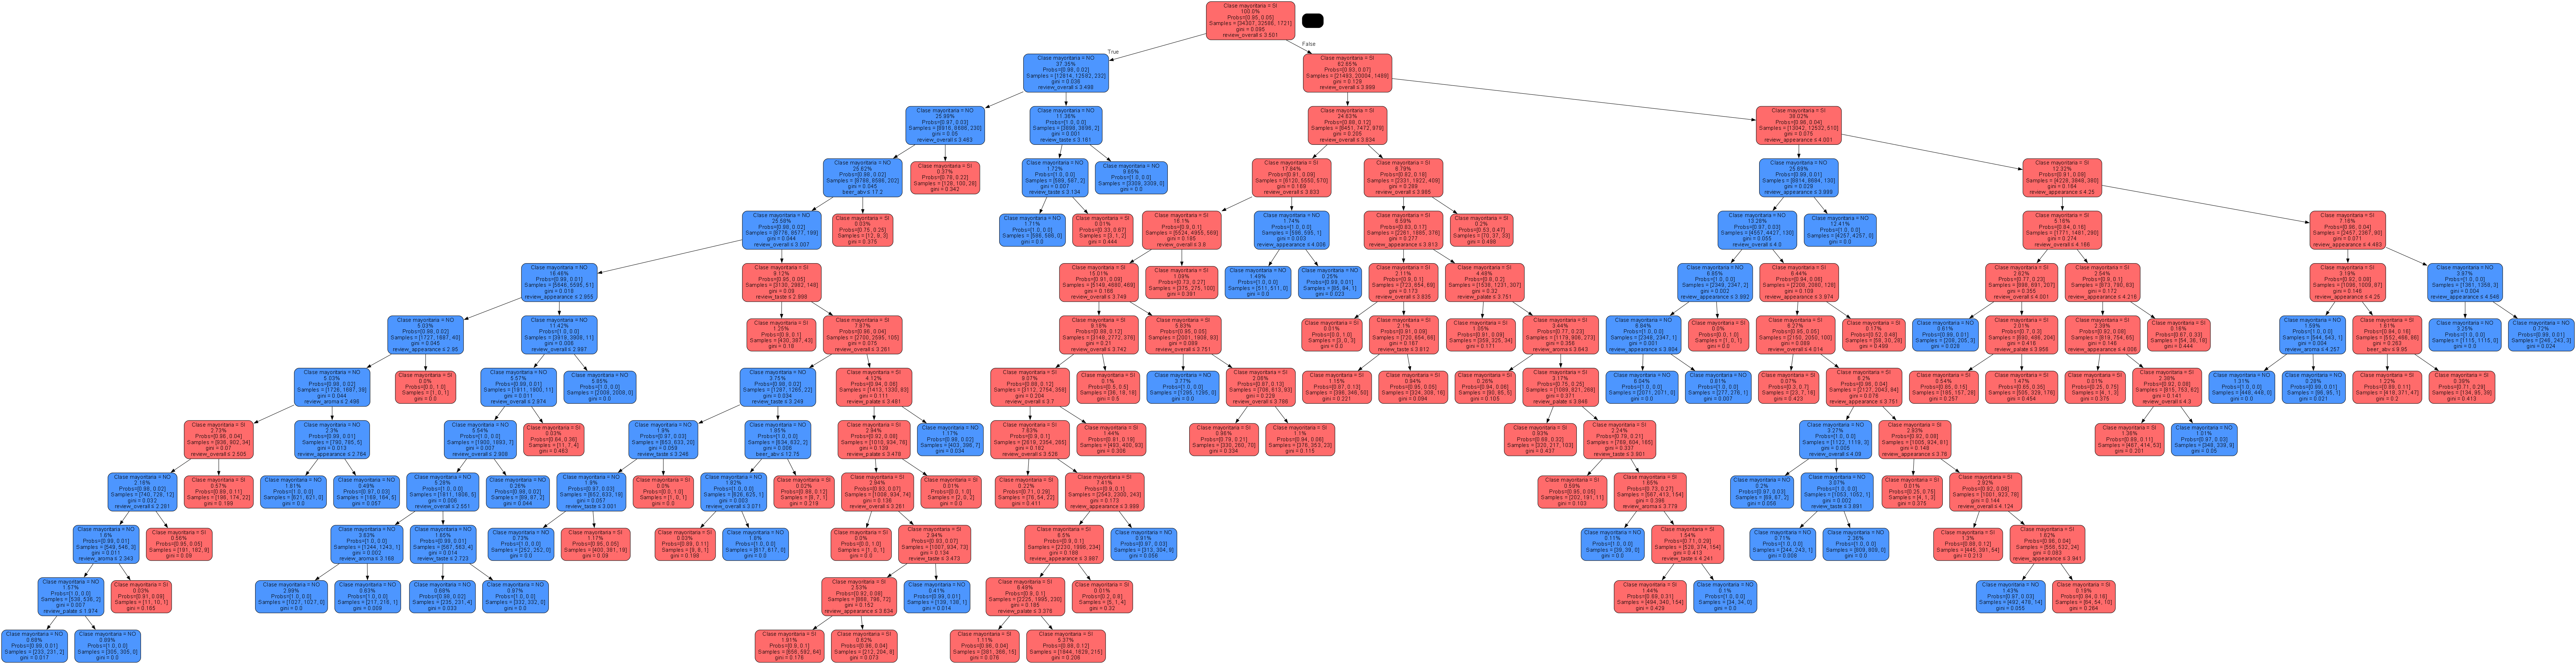

In [6]:
dot_data_value = agt.crear_arbol(clf, negative_class = 'NO', positive_class = 'SI', umbral = umbral_de_corte)

graph = pydotplus.graph_from_dot_data(dot_data_value)  
graph.set_size('"75,75"')
Image(graph.create_png())

In [7]:
y_testing_pred = clf.predict_proba(X_testing)

df_y_testing_pred_proba = pd.DataFrame(y_testing_pred, columns = ['NO_prob', 'SI_prob'])
y_testing_pred = atu.evaluar_corte(df_y_testing_pred_proba['NO_prob'].values, umbral_de_corte, 'SI', 'NO')

pre_prune_metricas = atu.calcular_metricas(
    y_true = Y_testing['es_popular'].values, 
    y_pred = y_testing_pred, 
    labels=['NO', 'SI']
)
pre_prune_metricas

{'true negatives': 10298,
 'true positives': 659,
 'false positives': 3668,
 'false negatives': 79,
 'accuracy': 0.7452,
 'recall': 0.893,
 'precision': 0.1523,
 'specificity': 0.7374,
 'tasa falso positivo': 0.2626,
 'tasa falso negativo': 0.0057,
 'f1': 0.2602,
 'metrica negocio': 2577.777777777778,
 'metrica optima negocio': 4000.0}

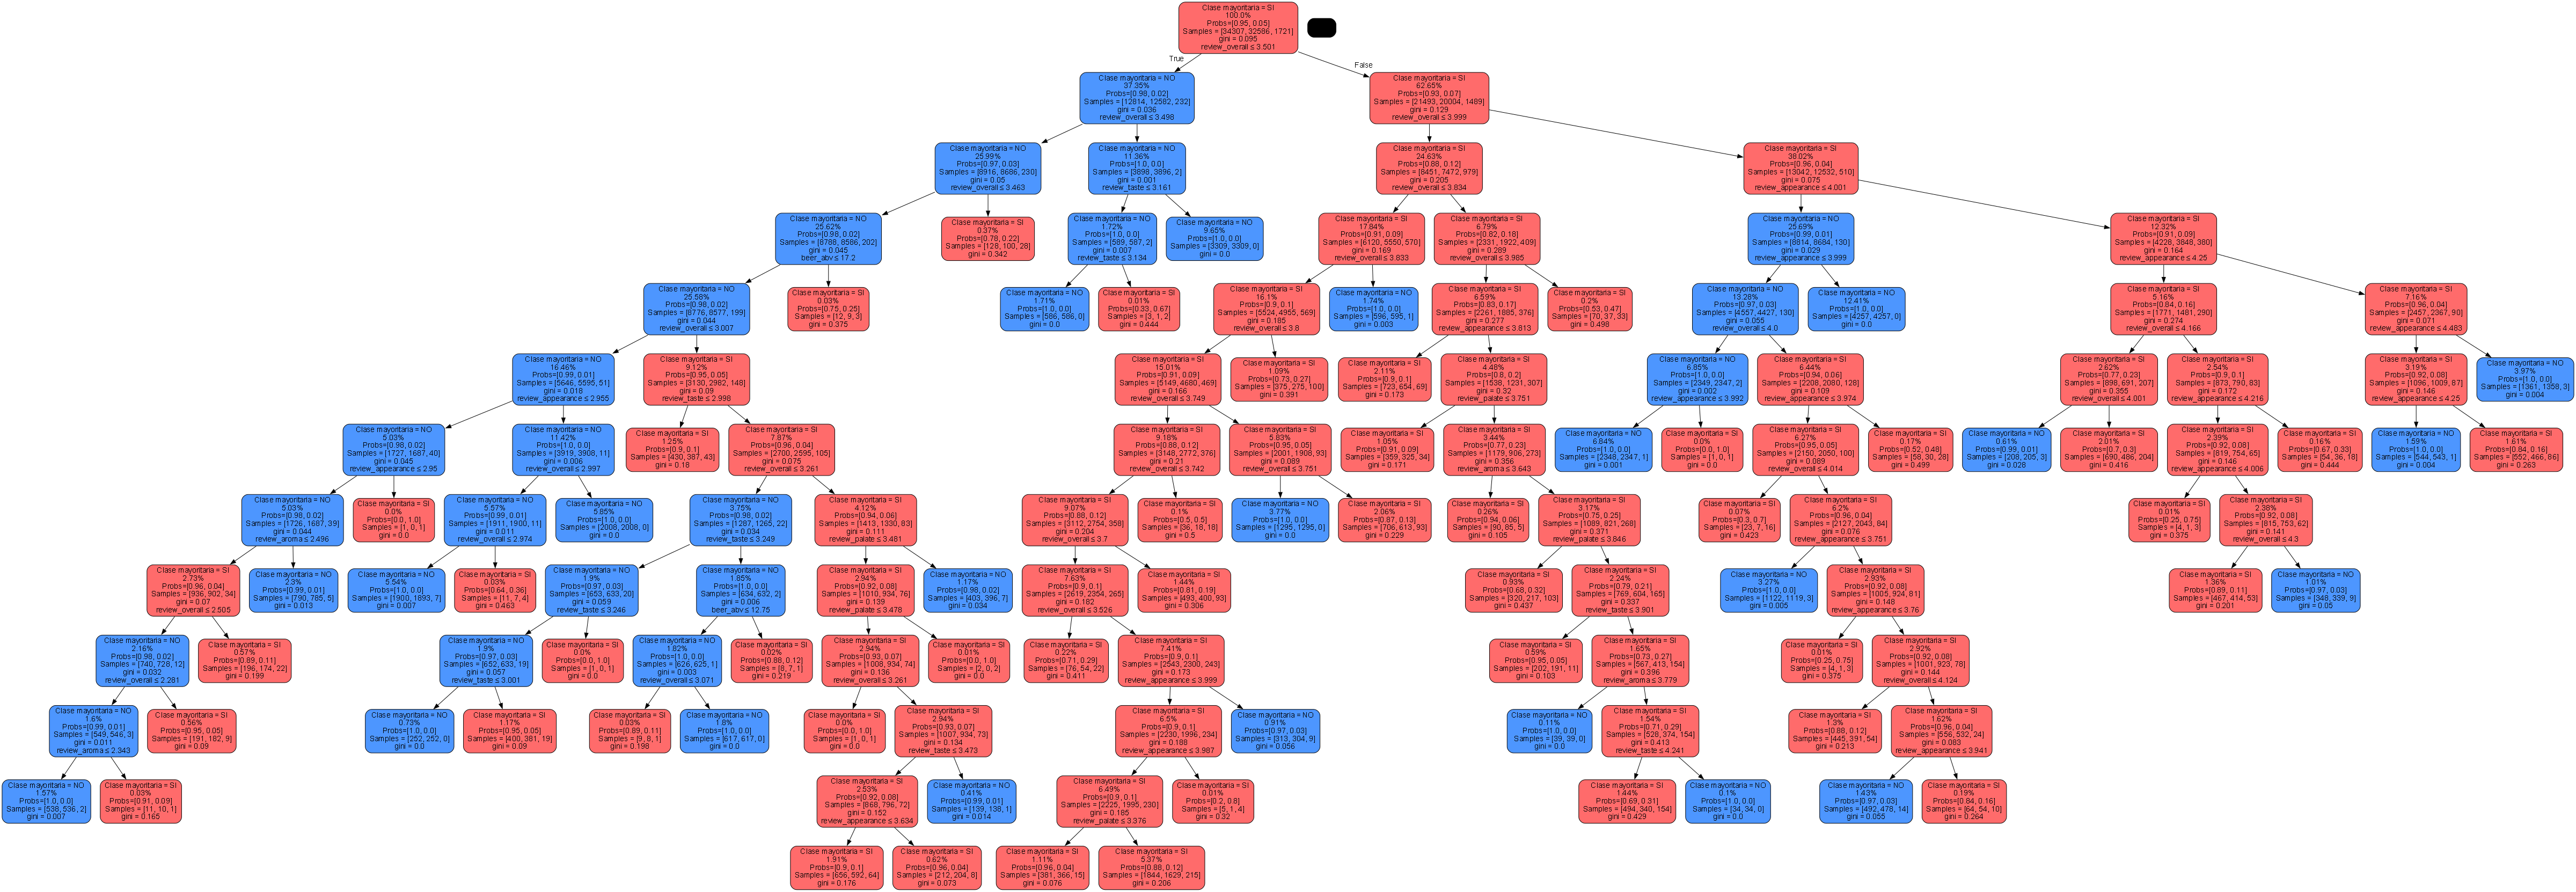

In [9]:
atu.prune_index(clf.tree_, 0, umbral_de_corte)

dot_data_value = agt.crear_arbol(clf, negative_class = 'NO', positive_class = 'SI', umbral = umbral_de_corte)

graph = pydotplus.graph_from_dot_data(dot_data_value)  
graph.set_size('"50,50"')
graph.write_png('img/modelo_3_prunned.png')
Image(graph.create_png())

In [10]:
y_testing_pred = clf.predict_proba(X_testing)

df_y_testing_pred_proba = pd.DataFrame(y_testing_pred, columns = ['NO_prob', 'SI_prob'])
y_testing_pred = atu.evaluar_corte(df_y_testing_pred_proba['NO_prob'].values, umbral_de_corte, 'SI', 'NO')

post_prune_metricas = atu.calcular_metricas(
    y_true = Y_testing['es_popular'].values, 
    y_pred = y_testing_pred, 
    labels=['NO', 'SI']
)

post_prune_metricas

{'true negatives': 10298,
 'true positives': 659,
 'false positives': 3668,
 'false negatives': 79,
 'accuracy': 0.7452,
 'recall': 0.893,
 'precision': 0.1523,
 'specificity': 0.7374,
 'tasa falso positivo': 0.2626,
 'tasa falso negativo': 0.0057,
 'f1': 0.2602,
 'metrica negocio': 2577.777777777778,
 'metrica optima negocio': 4000.0}

In [11]:
pre_prune_metricas

{'true negatives': 10298,
 'true positives': 659,
 'false positives': 3668,
 'false negatives': 79,
 'accuracy': 0.7452,
 'recall': 0.893,
 'precision': 0.1523,
 'specificity': 0.7374,
 'tasa falso positivo': 0.2626,
 'tasa falso negativo': 0.0057,
 'f1': 0.2602,
 'metrica negocio': 2577.777777777778,
 'metrica optima negocio': 4000.0}

In [12]:
y_testing_pred = clf.predict_proba(X_testing)

df_y_testing_pred_proba = pd.DataFrame(y_testing_pred, columns = ['NO_prob', 'SI_prob'])
y_testing_pred = atu.evaluar_corte(df_y_testing_pred_proba['NO_prob'].values, umbral_de_corte, 'SI', 'NO')

metricas = atu.calcular_metricas(
    y_true = Y_testing['es_popular'].values, 
    y_pred = y_testing_pred, 
    labels=['NO', 'SI']
)

parametros = {
    'max_depth': max_depth,
    'umbral_corte': umbral_de_corte, 
    'min_samples_split': min_samples_split,
    'max_features': max_features
}
    
[metricas, parametros]

[{'true negatives': 10298,
  'true positives': 659,
  'false positives': 3668,
  'false negatives': 79,
  'accuracy': 0.7452,
  'recall': 0.893,
  'precision': 0.1523,
  'specificity': 0.7374,
  'tasa falso positivo': 0.2626,
  'tasa falso negativo': 0.0057,
  'f1': 0.2602,
  'metrica negocio': 2577.777777777778,
  'metrica optima negocio': 4000.0},
 {'max_depth': 12,
  'umbral_corte': 0.9602996310010641,
  'min_samples_split': 0.015307032770458954,
  'max_features': 0.9999}]